#Exercicio:

O Ministério da Educação solicitou novamente a você uma previsão do percentual de alunos que serão aprovados no ano de 2017, tendo como base o ano de 2016.

Crie um modelo que consiga prever o valor de aprovação em 2016 com as aprovações de 2015.

Faça todo tratamento de dados aprendido e faça a regressão linear com Sklearn, normalize a base de dados e analise as métricas de R^2, MAE, MSE e RMSE do modelo.

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split # 
from sklearn.linear_model import LinearRegression #
from sklearn import metrics #

In [38]:
#Importe o arquivo formato xlsx
imoveis = pd.read_excel("imoveis.xlsx")
imoveis.head()

,area,preco
0,359.87,25000
1,353.12,45000
2,341.89,45000
3,435.99,20000
4,341.77,25000


In [39]:
# Tirando medidas estatisticas sobre o meu dataset de imoveis.
imoveis.describe()

,area,preco
count,54.000000,54.000000
mean,457.483519,41296.296296
std,261.527053,16488.566227
min,293.220000,20000.000000
25%,355.087500,30000.000000
50%,380.360000,40000.000000
75%,470.087500,50000.000000
max,2057.570000,120000.000000


In [40]:
# Verificação de nulos
imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   area    54 non-null     float64
 1   preco   54 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 992.0 bytes


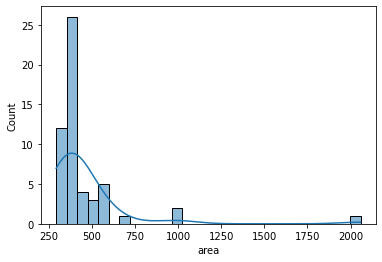

In [41]:
# Analisar melhor cada uma das variaveis, e já é possivel perceber que a maioria dos imoveis tem uma metragem mais baixa.
sns.histplot(imoveis, x="area", kde= True)

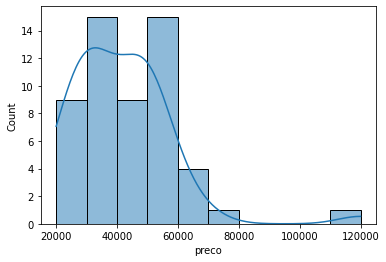

In [42]:
# Verificando agora o preço, e aqui já temos uma distribuição um pouco mais normalizada.
# E como não tem areas grandes, também não possui imoveis com o preço muito alto.
sns.histplot(imoveis, x="preco", kde= True)

In [43]:
# Vendo a correlação
imoveis.corr()

,area,preco
area,1.000000,0.511373
preco,0.511373,1.000000


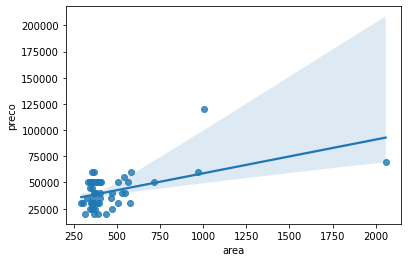

In [44]:
# Traçar a reta da regressão em cima dos pontos.
sns.regplot(x="area", y="preco", data=imoveis)

##Até o momento foi feito uma analise descritiva e uma analise exploratoria dos dados.

In [45]:
# A Area está na casa da centena e o preço já está mais no milhar, por esse motivo irea aplicar uma transformação
# dentro do dataset.
imoveis.describe()

,area,preco
count,54.000000,54.000000
mean,457.483519,41296.296296
std,261.527053,16488.566227
min,293.220000,20000.000000
25%,355.087500,30000.000000
50%,380.360000,40000.000000
75%,470.087500,50000.000000
max,2057.570000,120000.000000


In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apliquei o index para que ele mantenha a mesma ordem e informações original e o columns para manter o nome das colunas
imovel_norm = pd.DataFrame(scaler.fit_transform(imoveis), index=imoveis.index, columns=imoveis.columns)

In [47]:
# Agora os dados estão dentro da mesma medida de - até 1.
imovel_norm.head()

,area,preco
0,0.037776,0.05
1,0.033950,0.25
2,0.027585,0.25
3,0.080919,0.00
4,0.027517,0.05


In [48]:
imovel_norm.describe()

,area,preco
count,54.000000,54.000000
mean,0.093101,0.212963
std,0.148229,0.164886
min,0.000000,0.000000
25%,0.035065,0.100000
50%,0.049389,0.200000
75%,0.100245,0.300000
max,1.000000,1.000000


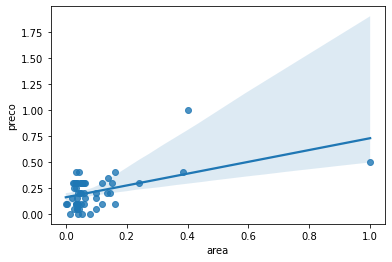

In [49]:
sns.regplot(x="area", y="preco", data=imovel_norm)

In [50]:
import statsmodels.formula.api as smf

In [51]:
#modelo MRLS
function = "preco~area"
model = smf.ols(formula=function, data=imovel_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     18.41
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           7.76e-05
Time:                        03:42:58   Log-Likelihood:                 29.402
No. Observations:                  54   AIC:                            -54.80
Df Residuals:                      52   BIC:                            -50.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1600      0.023      6.942      0.0

In [52]:
# Treinar o modelo de machine learning
x = imovel_norm [["area"]]

y = imovel_norm [["preco"]]

In [53]:
#Separando os dados de Treino e Teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.20, random_state=42)

# Criando um Objeto de Regressão Linear, o algoritmo de machine learning
lr= LinearRegression()

#Treinando o Modelo
lr.fit(x_treino, y_treino)


LinearRegression()

In [54]:
# Tirar as metricas para ver como que está se comportando o meu treino para ver as metricas de sucesso.
r_sq = lr.score(x_treino,y_treino)
print(r_sq)

0.2754399686961232


In [58]:
# Tirar as medidas mais númericas, vai treinar o x_treino com base para devolver a predição.
y_pred_treino = lr.predict(x_treino)
print('MAE:', metrics.mean_absolute_error(y_treino, y_pred_treino))
print('MSE:', metrics.mean_squared_error(y_treino, y_pred_treino))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_treino, y_pred_treino)))

MAE: 0.1068423059800295
MSE: 0.019987119738590717
RMSE: 0.1413758103021543


In [59]:
lr.fit(x_teste, y_teste)

LinearRegression()

In [60]:
y_pred_teste = lr.predict(x_teste)
print('MAE:', metrics.mean_absolute_error(y_teste, y_pred_teste))
print('MSE:', metrics.mean_squared_error(y_teste, y_pred_teste))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste)))

MAE: 0.10852020952335328
MSE: 0.01746864564020875
RMSE: 0.13216900408268478
